In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv("../data/mu-frac-iron-shower-signals.csv")
x_columns = df.columns[2:-2]
y_columns = df.columns[-2:]

In [22]:
X = df[x_columns]
y = df[y_columns].to_numpy().mean(axis=1)
y = np.maximum(y, 0)
X.describe()

,theta,energy,r,r_plane,S,delta_t,dt_aop,dt_peaks,dtul_asymm,dtapcnt_u,dtapcnt_l
count,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000,391534.000000
mean,29.559615,10.427639,1.324094,-0.045596,8.129914,0.188784,257.036837,6.296332,0.284603,0.870645,0.767913
std,10.821178,4.913696,0.498616,0.617294,16.111797,0.223825,163.964137,4.592978,0.163054,1.110630,1.013120
min,1.734300,1.408080,0.500004,-3.645990,0.466668,-0.362197,42.201500,0.000000,0.000000,0.000000,0.000000
25%,21.076000,6.234210,0.945826,-0.431252,0.964985,0.041168,121.641000,2.000000,0.166307,0.000000,0.000000
50%,31.452900,10.079600,1.274790,-0.040667,2.251665,0.114896,209.194500,5.000000,0.257195,1.000000,0.000000
75%,38.950100,14.034900,1.617190,0.345450,7.076835,0.248685,363.450500,9.000000,0.371818,1.000000,1.000000
max,44.996500,31.581200,4.176390,3.086980,233.131000,2.474140,1158.770000,30.000000,1.095700,13.000000,10.000000


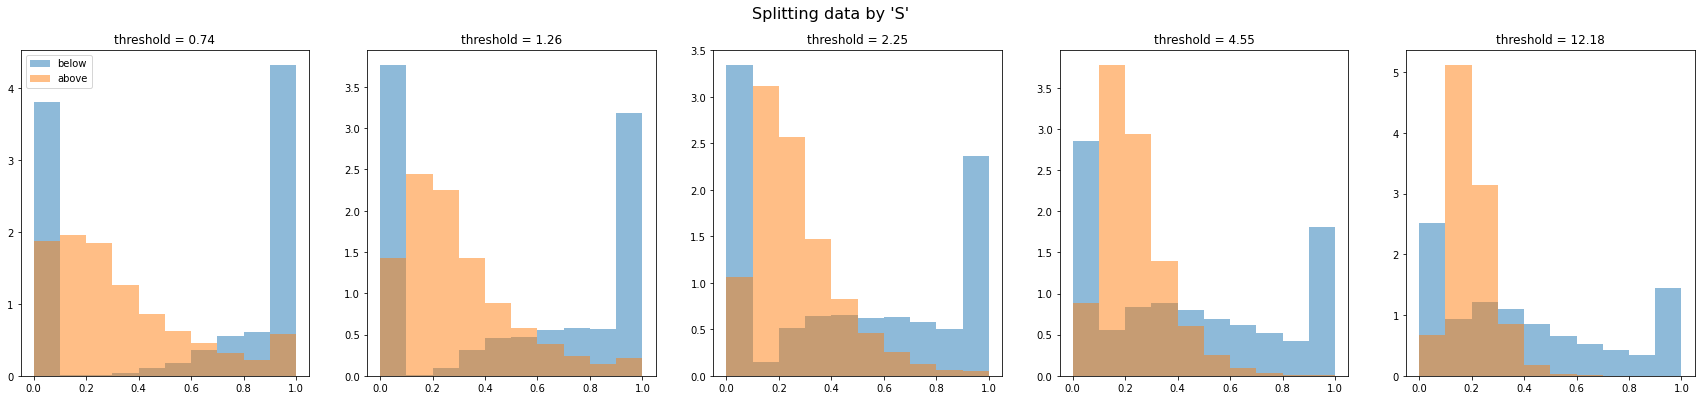

In [56]:
param = 'S'
n_thresholds = 5

fig, axes = plt.subplots(figsize=(6 * n_thresholds, 6), ncols=n_thresholds)

data = X[param]
thresholds = np.quantile(data, np.linspace(0, 1, n_thresholds + 2)[1:-1])

for idx, (threshold, ax) in enumerate(zip(thresholds, axes)):
    y_below = y[data < threshold]
    y_above = y[data >= threshold]
    ax.hist(y_below, label="below", density=True, alpha=0.5)
    ax.hist(y_above, label="above", density=True, alpha=0.5)
    ax.set_title(f"threshold = {threshold:.2f}")
    if idx == 0:
        ax.legend()

plt.suptitle(f'Splitting data by {param!r}', fontsize=16)
plt.show()